# In this assignment, you will implement linear regression with one variable.
### 100 points total

In [13]:
## DO NOT MODIFY

# The following line of code clears variables within an ipython environment
# It is simply a convenience for marking 
%reset_selective -f a

# Import relevant libraries 
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd

## Load data from data.csv file (5 Points)
Complete the function below to load the data from "data.csv".

The function should **return** [X, y] where X is the input and y is the target

In [14]:

def load_data(file_name):
    
    df = pd.read_csv(file_name)
    X = df.iloc[:, 0]
    y = df.iloc[:, 1]

    return X,y

 

The below line of code simply runs the function you should have written.

In [15]:
## DO NOT MODIFY

[X,y] = load_data("data.csv")

# Visualise the data (5 Points)

Complete the function 'vis_data'. This function should provide an overview of the data including a variety of useful plots.

In [16]:
def vis_data(X,y):
    # write your code here
    
  plt.scatter(X, y)
  plt.xlabel('A')
  plt.ylabel('B')
  plt.title('plot of A vs B')
  plt.show()

    

The below line of code simply runs the function you should have written.

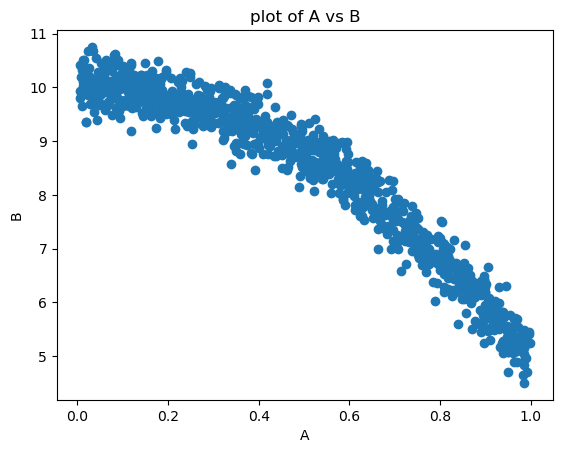

In [17]:
## DO NOT MODIFY

vis_data(X,y)

## Loss (10 Points)
Complete the function 'loss'. This function should calculate an appropriate loss when given the predicted and true values of 'y' (the variable being predicted).

In [30]:
# y_true --> the target values.
# y_pred --> the predicted values
def loss(y_true, y_pred):    
    #Calculating loss.
    loss = np.sqrt(((y_true - y_pred) ** 2).mean())
    return loss

### Test loss function
Implement a test for your loss function to demonstrate it provides the correct answer when used. The **assert** keyword is helpful here.

In [31]:
loss(np.array([5, 2]), np.array([10, 3]))

3.605551275463989

## Calculating Gradients (20 Points)
Complete the 'gradients' function. This function should calculate the partial derivatives of linear regression. One for the weights (dw) and one for the bias term/constant term (db).

In [34]:
#Input:
# X --> Input.
# y_true --> target values.
# y_pred --> predictions.
#return:
# dw --> the gradient with respect to the weights
# db --> the gradient with respect to the bias.
def gradients(X, y_true, y_pred):
    m = len(X)
    dw = (1/m) * np.dot(X.T, (y_pred - y_true))
    db = (1/m) * np.sum(y_pred - y_true)
    return dw, db

### Test gradients
Write tests to demonstrate that your gradient function produces the correct result. Please note that in 'computer land', the term 'equal' can be a bit problematic. Consider looking up **'assert_almost_equal'** in the numpy libraries.

In [35]:
dw,db = gradients(np.array([5]),np.array([1.5]),np.array([1.1]))
print(f'dw = {dw} , db = {db}')

dw = -1.9999999999999996 , db = -0.3999999999999999


## Training (25 Points)
Complete the 'train' function. The '...' should be changed for any additional arguments you believe the function should have (hint, it should have further arguments). It should return the weights and bias term for a linear regression model. Please note, you **must** use your previously implemented functions (rather than just copy-pasting the code).

In [45]:
# X --> Input.
# y --> true/target value.
# add more arguments as you need
def train(X, y, learning_rate, n_epochs):
    w = 0
    b = 0

    for i in range(n_epochs):
        # Calculate the predictions with the current parameters
        y_pred = w*X + b

        # Calculate the loss with the true values and predictions
        l = loss(y, y_pred)

        # Print the loss every 50 iterations
        if i % 50 == 0:
            print(f'Loss at epoch {i} is {l}')

        # Calculate the gradients
        dw, db = gradients(X, y, y_pred)

        # Update the parameters
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b
"""w, b = train_model(X, y, learning_rate=0.01, n_epochs=1000)
print(f'Trained model with parameters w = {w} and b = {b}') """     
   

"w, b = train_model(X, y, learning_rate=0.01, n_epochs=1000)\nprint(f'Trained model with parameters w = {w} and b = {b}') "

Test your function on the provided data. Please comment on the success of the training and any notable features thereof in the markdown provided below.

In [47]:
w, b = train(X, y, learning_rate=0.01, n_epochs=7500)
print(w)
print(b)

Loss at epoch 0 is 8.540737530874042
Loss at epoch 50 is 4.971657568135303
Loss at epoch 100 is 3.295086003103022
Loss at epoch 150 is 2.589502150387863
Loss at epoch 200 is 2.303643762990349
Loss at epoch 250 is 2.167797904717852
Loss at epoch 300 is 2.0806313901387816
Loss at epoch 350 is 2.009632278603721
Loss at epoch 400 is 1.944981319014878
Loss at epoch 450 is 1.8837404859575564
Loss at epoch 500 is 1.8250023732889695
Loss at epoch 550 is 1.7684547824512016
Loss at epoch 600 is 1.7139606330180308
Loss at epoch 650 is 1.661435403529251
Loss at epoch 700 is 1.6108113757364797
Loss at epoch 750 is 1.562027168496669
Loss at epoch 800 is 1.5150246367759446
Loss at epoch 850 is 1.469747915939225
Loss at epoch 900 is 1.4261430916427893
Loss at epoch 950 is 1.3841580529438575
Loss at epoch 1000 is 1.3437423998424118
Loss at epoch 1050 is 1.3048473677515797
Loss at epoch 1100 is 1.2674257579649044
Loss at epoch 1150 is 1.2314318709297474
Loss at epoch 1200 is 1.1968214413981892
Loss at e

### Write your observations here
...

## Prediction (15 Points)
Complete the 'predict' function. This function should provide a prediction of the target variable given input variables and appropriately determined weights and biases.

In [58]:
def predict(X, w, b):
    y_pred = w*X + b
    return y_pred

### Visualise your predictions
The code below will produce a visualisation of the real data and your model prediction. The two should bear some resemblance. If they look very different, you have probably made an error.

Text(0.5, 1.0, 'Regression')

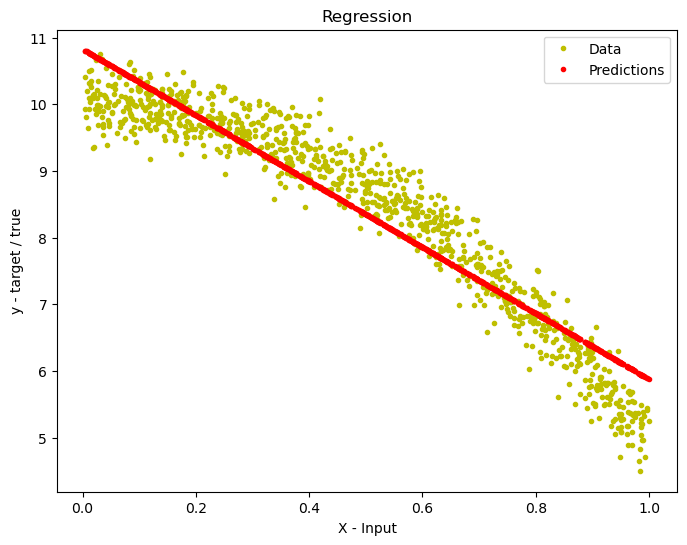

In [61]:
## DO NOT MODIFY

fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b), 'r.')  ## <- Update this function signature as needed 
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

### Calculate the fit score
The code below will calculate some useful metrics.

In [63]:
## DO NOT MODIFY

from sklearn.metrics import r2_score
y_true = y
y_pred = predict(X, w, b) ## <- Update this function signature as needed 
r2_score(y_true, y_pred)

0.9007156198099657

### Use scikit-learn to fit a linear regression model using the data from data,csv (20 points)
Now you have manually implemented linear regression, do it the easier way using scikit-learn. Consider the following things:
* Loading data
* Data description
* Training and applying models
* Evaluation metrics
* Informative and comprehensive visualisations

Coeff: [-5.00512218]
Intercept: 10.855039296222804
Mean Squared Error (MSE): 0.4853898865521802
R-squared (R**2) Score: 0.9007156198099657


Text(0.5, 1.0, 'Regression')

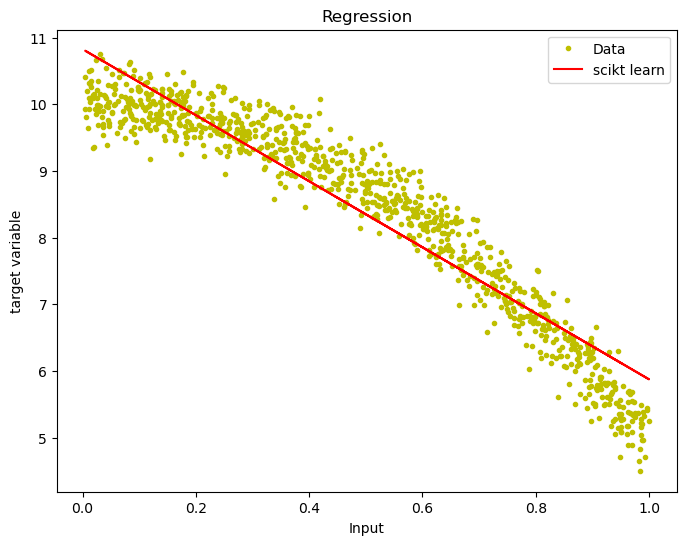

In [65]:
## Write your coimport pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.read_csv("data.csv")
X = df.iloc[:, :-1]  # Input features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Create a linear regression model
m = LinearRegression()

# Fit the model to the data
m.fit(X, y)

print("Coeff:", m.coef_)
print("Intercept:", m.intercept_)

mse = loss(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R**2) Score:", r2)
"""fig = plt.figure(figsize=(8,6))
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Sk- learn")
plt.plot(X, predict(X, w, b), color='green', label = "Built-Myself")
plt.xlabel("X")
plt.ylabel("y")
plt.title("LR")
plt.legend()
plt.show()"""

fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, y_pred, color='red')
plt.legend(["Data", "scikt learn"])
plt.xlabel('Input')
plt.ylabel('target variable')
plt.title('Regression')